<a href="https://colab.research.google.com/github/YalcEs/Data-Analyst-Portfolio/blob/main/esra_python_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'salesdpython:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5153721%2F8611768%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240624%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240624T222340Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D02b9cb98c470d3e90cc8c19558b82b97fcc5ea561e947188cc7e3e4aae6b50535e5d4e69600225b9f611e0a385eb19305bd0c826ca8eb9b6f0857bc574f0921f7b8c0625e9ee97207cc381e6e7726e1e0b27c58b0509e56a864544da039b1ebba083521b3f4f6f44a91bb41021f6e2e923ae8f42222deb14723963737bbfa42f088e49d000f759f305971e409a8bea8506ebc98b4f4dac778d5c9553d30f2fbb8619c3abfd4b7b7cbc1ae7a44f3d8383cf6fa4ff8a95b798765462b5f5f4c3e641c93708848861f768cfea342d406e0917a76a89da062dfa443db6dd3e7fbca9bfb59447fb26fbb8ddcc290ef6a47704e8ea104e7fbcdf6b55101cabdf5040e1'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salesdpython/sales_data_sample.csv


# **STEP 1: SETTING UP THE ENVIRONMENT**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# **STEP 2: DATA LOADING AND EXPLORATION**

In [ ]:

df = pd.read_csv("/kaggle/input/salesdpython/sales_data_sample.csv",encoding='latin1')
df


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [ ]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [ ]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [ ]:
df.shape

(2823, 25)

In [ ]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [ ]:
df_value=pd.DataFrame(df.value_counts())
df_value

count
ORDERNUMBER QUANTITYORDERED PRICEEACH ORDERLINENUMBER SALES   ORDERDATE       STATUS     QTR_ID MONTH_ID YEAR_ID PRODUCTLINE      MSRP PRODUCTCODE CUSTOMERNAME               PHONE           ADDRESSLINE1                            ADDRESSLINE2 CITY         STATE    POSTALCODE COUNTRY   TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE       
10120       22              100.00    6               2461.36 4/29/2003 0:00  Shipped    2      4        2003    Motorcycles      99   S32_1374    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne    Victoria 3004       Australia APAC      Ferguson        Peter            Small         1
10361       34              100.00    6               3871.92 12/17/2004 0:00 Shipped    4      12       2004    Vintage Cars     65   S24_3420    Souveniers And Things Co.  +61 2 9495 8555 Monitor Money Building, 815 Pacific Hwy Level 6      Chatswood    NSW      2067       Australia APAC      Huxley          Adrian           Medium        1
10347       30              100.00    1               3944.70 11/29/2004 0:00 Shipped    4      11       2004    Classic Cars     214  S10_1949    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne    Victoria 3004       Australia APAC      Ferguson        Peter            Medium        1
            34              64.96     10              2208.64 11/29/2004 0:00 Shipped    4      11       2004    Vintage Cars     62   S18_2957    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne    Victoria 3004       Australia APAC      Ferguson        Peter            Small         1
            42              49.60     5               2083.20 11/29/2004 0:00 Shipped    4      11       2004    Trucks and Buses 116  S18_1097    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne    Victoria 3004       Australia APAC      Ferguson        Peter            Small         1
...                                                                                                                                                                                                                                                                                                                                                  ...
10169       38              68.39     8               2598.82 11/4/2003 0:00  Shipped    4      11       2003    Motorcycles      62   S18_3782    Anna's Decorations, Ltd    02 9936 8555    201 Miller Street                       Level 15     North Sydney NSW      2060       Australia APAC      O'Hara          Anna             Small         1
                            74.11     11              2816.18 11/4/2003 0:00  Shipped    4      11       2003    Motorcycles      69   S24_2360    Anna's Decorations, Ltd    02 9936 8555    201 Miller Street                       Level 15     North Sydney NSW      2060       Australia APAC      O'Hara          Anna             Small         1
            48              80.55     10              3866.40 11/4/2003 0:00  Shipped    4      11       2003    Motorcycles      81   S50_4713    Anna's Decorations, Ltd    02 9936 8555    201 Miller Street                       Level 15     North Sydney NSW      2060       Australia APAC      O'Hara          Anna             Medium        1
10223       20              66.04     12              1320.80 2/20/2004 0:00  Shipped    1      2        2004    Vintage Cars     68   S32_4289    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne    Victoria 3004       Australia APAC      Ferguson        Peter            Small         1
10420       66              92.95     6               6134.70 5/29/2005 0:00  In Process 2      5        2005    Vintage Cars     92   S18_4409    Souveniers And Things Co.  +61 2 9495 8555 Monitor M

In [ ]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [ ]:
df['TERRITORY'].head(20)

0      NaN
1     EMEA
2     EMEA
3      NaN
4      NaN
5      NaN
6     EMEA
7     EMEA
8      NaN
9     EMEA
10    APAC
11     NaN
12     NaN
13     NaN
14    EMEA
15     NaN
16    EMEA
17    EMEA
18     NaN
19     NaN
Name: TERRITORY, dtype: object

In [ ]:
df_region=df[['COUNTRY','TERRITORY']]
df_region.groupby('COUNTRY')['TERRITORY'].mode()

AttributeError: 'SeriesGroupBy' object has no attribute 'mode'

In [ ]:
df['TERRITORY']=df['TERRITORY'].fillna('North America')

In [ ]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY              0
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [ ]:
df_value=pd.DataFrame(df.value_counts())
df_value

count
ORDERNUMBER QUANTITYORDERED PRICEEACH ORDERLINENUMBER SALES   ORDERDATE       STATUS     QTR_ID MONTH_ID YEAR_ID PRODUCTLINE      MSRP PRODUCTCODE CUSTOMERNAME               PHONE           ADDRESSLINE1                            ADDRESSLINE2 CITY      STATE    POSTALCODE COUNTRY   TERRITORY     CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE       
10102       39              100.00    2               4808.31 1/10/2003 0:00  Shipped    1      1        2003    Vintage Cars     102  S18_1342    Vitachrome Inc.            2125551500      2678 Kingston Rd.                       Suite 101    NYC       NY       10022      USA       North America Frick           Michael          Medium        1
10342       22              100.00    3               3160.74 11/24/2004 0:00 Shipped    4      11       2004    Classic Cars     142  S18_1984    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne Victoria 3004       Australia APAC          Ferguson        Peter            Medium        1
10324       38              100.00    6               6832.02 11/5/2004 0:00  Shipped    4      11       2004    Vintage Cars     50   S18_4668    Vitachrome Inc.            2125551500      2678 Kingston Rd.                       Suite 101    NYC       NY       10022      USA       North America Frick           Michael          Medium        1
            47              100.00    8               7207.45 11/5/2004 0:00  Shipped    4      11       2004    Classic Cars     163  S18_2238    Vitachrome Inc.            2125551500      2678 Kingston Rd.                       Suite 101    NYC       NY       10022      USA       North America Frick           Michael          Large         1
            48              100.00    4               8209.44 11/5/2004 0:00  Shipped    4      11       2004    Trucks and Buses 64   S32_3522    Vitachrome Inc.            2125551500      2678 Kingston Rd.                       Suite 101    NYC       NY       10022      USA       North America Frick           Michael          Large         1
...                                                                                                                                                                                                                                                                                                                                                   ...
10204       39              33.23     2               1295.97 12/2/2003 0:00  Shipped    4      12       2003    Vintage Cars     41   S24_3969    Muscle Machine Inc         2125557413      4092 Furth Circle                       Suite 400    NYC       NY       10022      USA       North America Young           Jeff             Small         1
            40              79.62     9               3184.80 12/2/2003 0:00  Shipped    4      12       2003    Classic Cars     85   S24_3191    Muscle Machine Inc         2125557413      4092 Furth Circle                       Suite 400    NYC       NY       10022      USA       North America Young           Jeff             Medium        1
                            100.00    13              4032.00 12/2/2003 0:00  Shipped    4      12       2003    Classic Cars     124  S18_1589    Muscle Machine Inc         2125557413      4092 Furth Circle                       Suite 400    NYC       NY       10022      USA       North America Young           Jeff             Medium        1
            42              100.00    7               4242.00 12/2/2003 0:00  Shipped    4      12       2003    Classic Cars     117  S24_2887    Muscle Machine Inc         2125557413      4092 Furth Circle                       Suite 400    NYC       NY       10022      USA       North America Young           Jeff             Medium        1
10420       66              92.95     6               6134.70 5/29/2005 0:00  In Process 2      5        2005    Vintage Cars     92   S18_4409    Souveniers And Things Co.  +61 2 9495 855

In [ ]:
df['TERRITORY']=df['TERRITORY'].replace('Japan','APAC')

<Axes: >

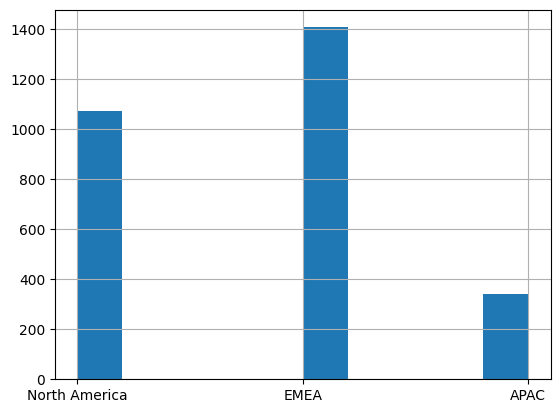

In [ ]:
df['TERRITORY'].hist()

In [ ]:
df_null=df.columns[df.isna().any()].tolist()
df_with_null=df[df_null]

In [ ]:
df_with_null

,ADDRESSLINE2,STATE,POSTALCODE
0,NaN,NY,10022
1,NaN,NaN,51100
2,NaN,NaN,75508
3,NaN,CA,90003
4,NaN,CA,NaN
...,...,...,...
2818,NaN,NaN,28034
2819,NaN,NaN,90110
2820,NaN,NaN,28034
2821,NaN,NaN,31000


# ****STEP 3: DATA VISUALISATION

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


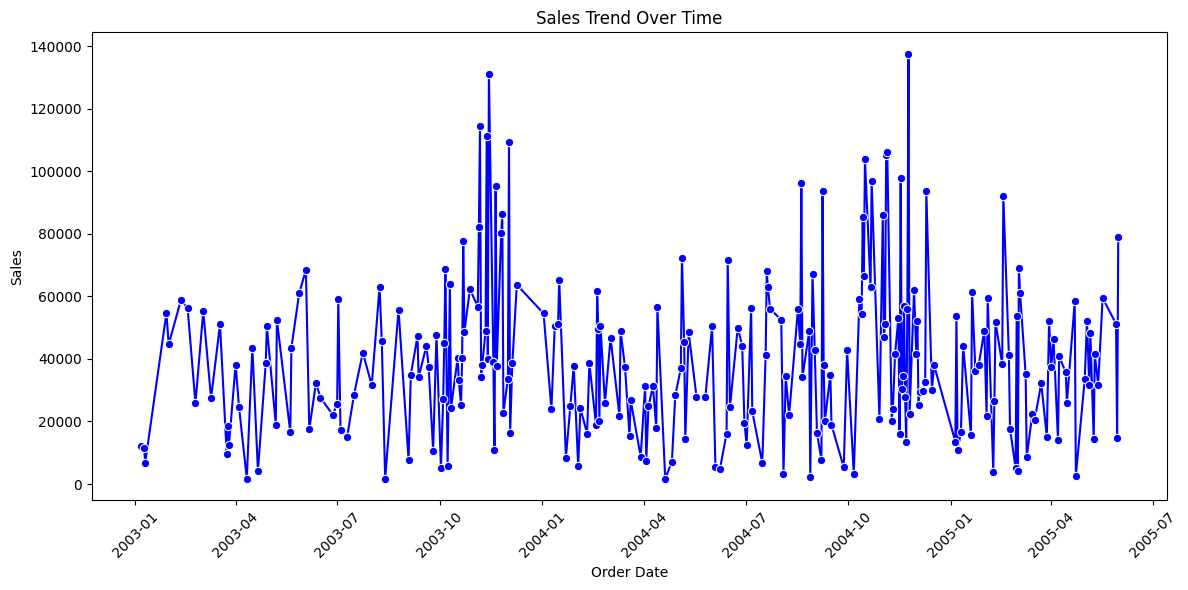

In [ ]:
# 1.Use seaborn and matplotlib to create a line plot visualising sales data over time


df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
sales_over_time = df.groupby('ORDERDATE')['SALES'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='ORDERDATE', y='SALES', data=sales_over_time, marker='o', color='b')
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

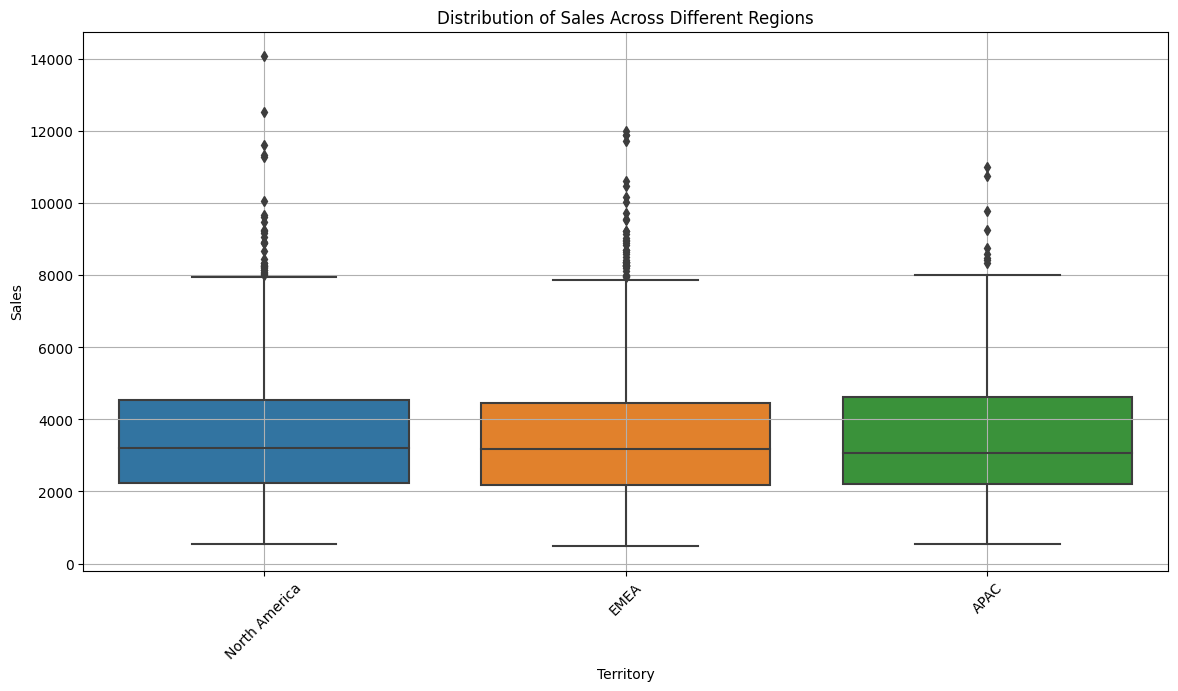

In [ ]:
# 2. Plotting the distribution of sales across different regions
plt.figure(figsize=(14, 7))
sns.boxplot(x='TERRITORY', y='SALES', data=df)
plt.title('Distribution of Sales Across Different Regions')
plt.xlabel('Territory')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

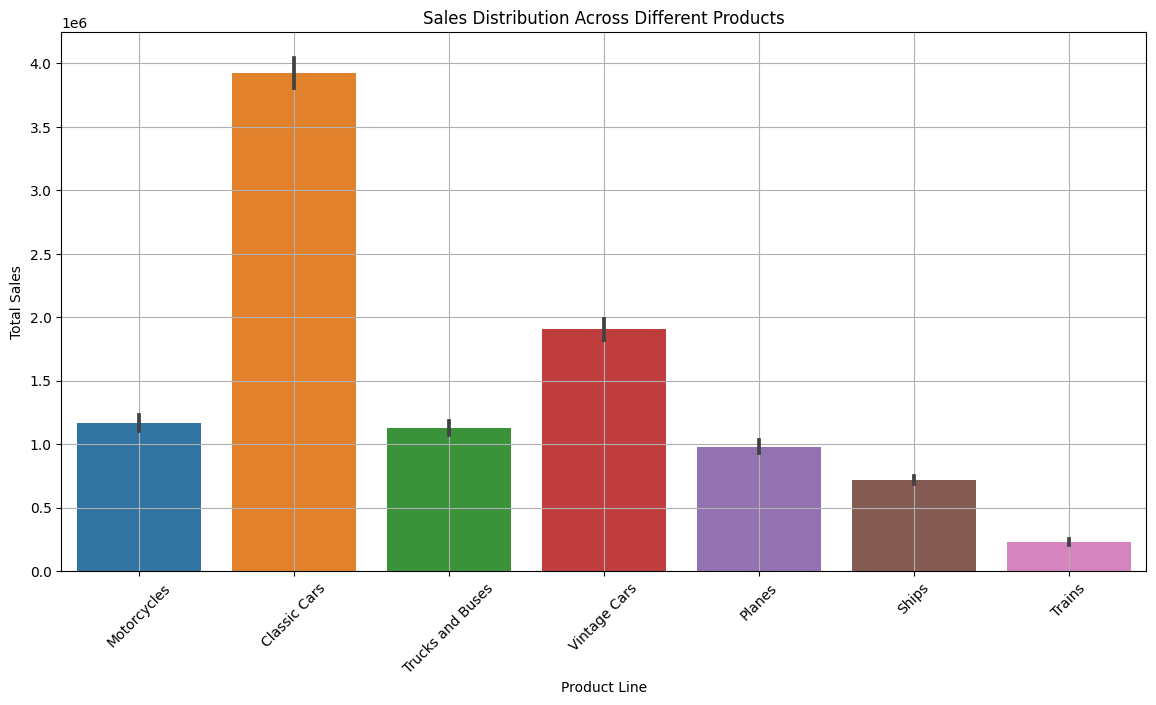

In [ ]:
# 3. Plotting the sales distribution across different products
plt.figure(figsize=(14, 7))
sns.barplot(x='PRODUCTLINE', y='SALES', data=df, estimator=sum)
plt.title('Sales Distribution Across Different Products')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

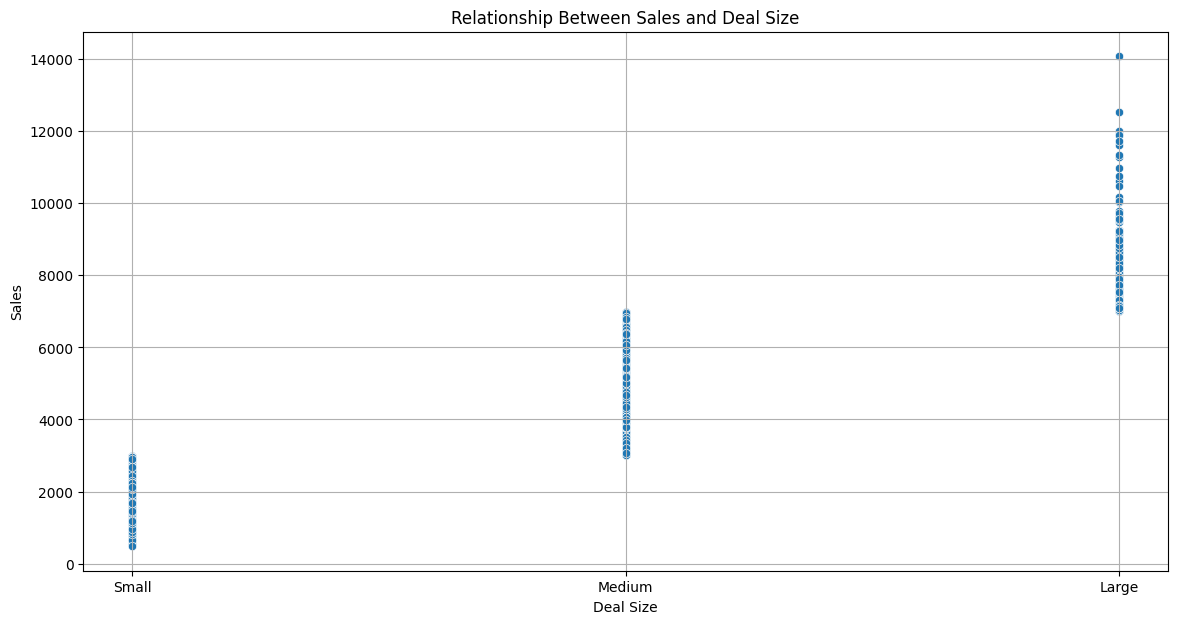

In [ ]:
# 4.Plotting the relationship between sales and dealsize
plt.figure(figsize=(14, 7))
sns.scatterplot(x='DEALSIZE', y='SALES', data=df)
plt.title('Relationship Between Sales and Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# STEP 4: 4.DATA ANALYSIS**

In [ ]:
# 1. Grouping and aggregating the sales data based on different factors

# Group by product line and sum the sales
sales_by_product = df.groupby('PRODUCTLINE')['SALES'].sum().reset_index()
print('Sales by Product Line:')
print(sales_by_product.head())



Sales by Product Line:
    PRODUCTLINE       SALES
0  Classic Cars  3919615.66
1   Motorcycles  1166388.34
2        Planes   975003.57
3         Ships   714437.13
4        Trains   226243.47


In [ ]:
# Group by territory and sum the sales
sales_by_region = df.groupby('TERRITORY')['SALES'].sum().reset_index()
print('Sales by Region:')
print(sales_by_region.head())

Sales by Region:
       TERRITORY       SALES
0           APAC  1201295.05
1           EMEA  4979272.41
2  North America  3852061.39


In [ ]:

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['YEAR'] = df['ORDERDATE'].dt.year
yearly_sales = df.groupby('YEAR')['SALES'].sum().reset_index()
print("\nSales data aggregated by Year:")
print(yearly_sales)


Sales data aggregated by Year:
   YEAR       SALES
0  2003  3516979.54
1  2004  4724162.60
2  2005  1791486.71


In [ ]:
# 2.Calculate the percentage of sales contributed by each region

total_sales = df['SALES'].sum()
sales_by_region['PERCENTAGE'] = (sales_by_region['SALES'] / total_sales) * 100
print('Percentage of Sales by Region:')
print(sales_by_region)

Percentage of Sales by Region:
       TERRITORY       SALES  PERCENTAGE
0           APAC  1201295.05   11.973881
1           EMEA  4979272.41   49.630785
2  North America  3852061.39   38.395334


In [ ]:
# 3. Analyzing the performance of different products in terms of sales


sales_by_product = df.groupby('PRODUCTLINE')['SALES'].sum().reset_index()
sales_by_product = sales_by_product.sort_values(by='SALES', ascending=False)
print('Performance of Different Products in Terms of Sales:')
print(sales_by_product)

Performance of Different Products in Terms of Sales:
        PRODUCTLINE       SALES
0      Classic Cars  3919615.66
6      Vintage Cars  1903150.84
1       Motorcycles  1166388.34
5  Trucks and Buses  1127789.84
2            Planes   975003.57
3             Ships   714437.13
4            Trains   226243.47


In [ ]:
# 4.Calculate the correlation between sales and dealsize
correlation = df[['SALES', 'DEALSIZE']].corr()
print('Correlation between Sales and Deal Size:')
print(correlation)

ValueError: could not convert string to float: 'Small'

In [ ]:
if 'DEALSIZE' in df.columns:
    # Convert 'DEALSIZE' to numeric using ordinal encoding
    deal_size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3}
    df['DEALSIZE_NUMERIC'] = df['DEALSIZE'].map(deal_size_mapping)

    # Check if 'SALES' column exists
    if 'SALES' in df.columns:
        correlation = df[['SALES', 'DEALSIZE_NUMERIC']].corr()
        print('Correlation between Sales and Deal Size:')
        print(correlation)
    else:
        print("The DataFrame does not contain a column named 'SALES'. Please check the DataFrame.")
        print("Available columns:", df.columns)
else:
    print("The DataFrame does not contain a column named 'DEALSIZE'. Please check the DataFrame.")
    print("Available columns:", df.columns)

Correlation between Sales and Deal Size:
                     SALES  DEALSIZE_NUMERIC
SALES             1.000000          0.862814
DEALSIZE_NUMERIC  0.862814          1.000000


In [ ]:
# 5.Identify the top-performing (top 3) products in terms of sales year on year


print('Extracting year from order date...')
df['YEAR'] = df['ORDERDATE'].dt.year
sales_by_year_product = df.groupby(['YEAR', 'PRODUCTLINE'])['SALES'].sum().reset_index()
sales_by_year_product = sales_by_year_product.sort_values(by=['YEAR', 'SALES'], ascending=[True, False])
top_3_products_by_year = sales_by_year_product.groupby('YEAR').head(3)
print('Top 3 Products by Year:')
print(top_3_products_by_year)

Extracting year from order date...
Top 3 Products by Year:
    YEAR       PRODUCTLINE       SALES
0   2003      Classic Cars  1484785.29
6   2003      Vintage Cars   650987.76
5   2003  Trucks and Buses   420429.93
7   2004      Classic Cars  1762257.09
13  2004      Vintage Cars   911423.77
8   2004       Motorcycles   560545.23
14  2005      Classic Cars   672573.28
20  2005      Vintage Cars   340739.31
15  2005       Motorcycles   234947.53


In [ ]:
# 6. Calculate the percentage of sales contributed by the top-performing products


sales_by_year_product = df.groupby(['YEAR_ID', 'PRODUCTLINE'])['SALES'].sum().reset_index()

sales_by_year_product = sales_by_year_product.sort_values(by=['YEAR_ID', 'SALES'], ascending=[True, False])

top_3_products_by_year = sales_by_year_product.groupby('YEAR_ID').head(3)

total_sales_by_year = df.groupby('YEAR_ID')['SALES'].sum().reset_index()


merged_df = pd.merge(top_3_products_by_year, total_sales_by_year, on='YEAR_ID', suffixes=('_product', '_total'))

merged_df['PERCENTAGE'] = (merged_df['SALES_product'] / merged_df['SALES_total']) * 100

print('Top 3 Products by Year with Percentage of Sales:')
print(merged_df)




Top 3 Products by Year with Percentage of Sales:
   YEAR_ID       PRODUCTLINE  SALES_product  SALES_total  PERCENTAGE
0     2003      Classic Cars     1484785.29   3516979.54   42.217627
1     2003      Vintage Cars      650987.76   3516979.54   18.509853
2     2003  Trucks and Buses      420429.93   3516979.54   11.954290
3     2004      Classic Cars     1762257.09   4724162.60   37.303057
4     2004      Vintage Cars      911423.77   4724162.60   19.292811
5     2004       Motorcycles      560545.23   4724162.60   11.865494
6     2005      Classic Cars      672573.28   1791486.71   37.542745
7     2005      Vintage Cars      340739.31   1791486.71   19.019918
8     2005       Motorcycles      234947.53   1791486.71   13.114668


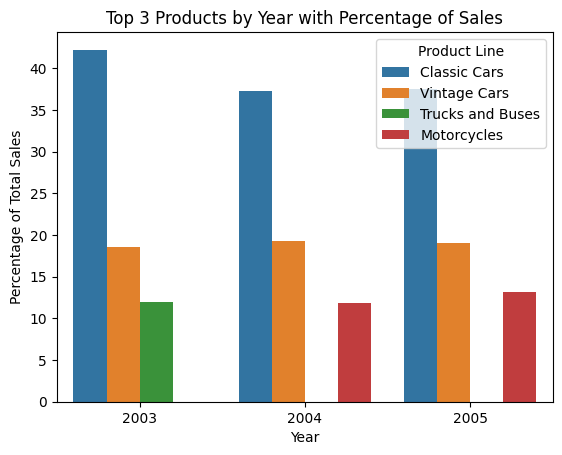

In [ ]:
sns.barplot(data=merged_df, x='YEAR_ID', y='PERCENTAGE', hue='PRODUCTLINE')

# Set the title and labels
plt.title('Top 3 Products by Year with Percentage of Sales')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Sales')
plt.legend(title='Product Line')

# Show the plot
plt.show()

In [ ]:
# 7.Analyze the performance of different regions in terms of sales and deal size


sales_by_region_dealsize = df.groupby(['COUNTRY', 'DEALSIZE'])['SALES'].sum().reset_index()

sales_by_region_dealsize = sales_by_region_dealsize.sort_values(by=['COUNTRY', 'SALES'], ascending=[True, False])

total_sales_by_region = df.groupby('COUNTRY')['SALES'].sum().reset_index()

merged_region_df = pd.merge(sales_by_region_dealsize, total_sales_by_region, on='COUNTRY', suffixes=('_dealsize', '_total'))

merged_region_df['PERCENTAGE'] = (merged_region_df['SALES_dealsize'] / merged_region_df['SALES_total']) * 100

print('Sales by Region and Deal Size with Percentage of Sales:')
print(merged_region_df)

Sales by Region and Deal Size with Percentage of Sales:
        COUNTRY DEALSIZE  SALES_dealsize  SALES_total  PERCENTAGE
0     Australia   Medium       381245.00    630623.10   60.455286
1     Australia    Small       189126.06    630623.10   29.990348
2     Australia    Large        60252.04    630623.10    9.554366
3       Austria   Medium       125314.10    202062.53   62.017485
4       Austria    Small        43956.35    202062.53   21.753835
5       Austria    Large        32792.08    202062.53   16.228679
6       Belgium   Medium        71531.37    108412.62   65.980667
7       Belgium    Small        36881.25    108412.62   34.019333
8        Canada   Medium       137430.48    224078.56   61.331383
9        Canada    Small        77583.19    224078.56   34.623210
10       Canada    Large         9064.89    224078.56    4.045407
11      Denmark   Medium       140050.70    245637.15   57.015276
12      Denmark    Small        55699.78    245637.15   22.675634
13      Denmark    L

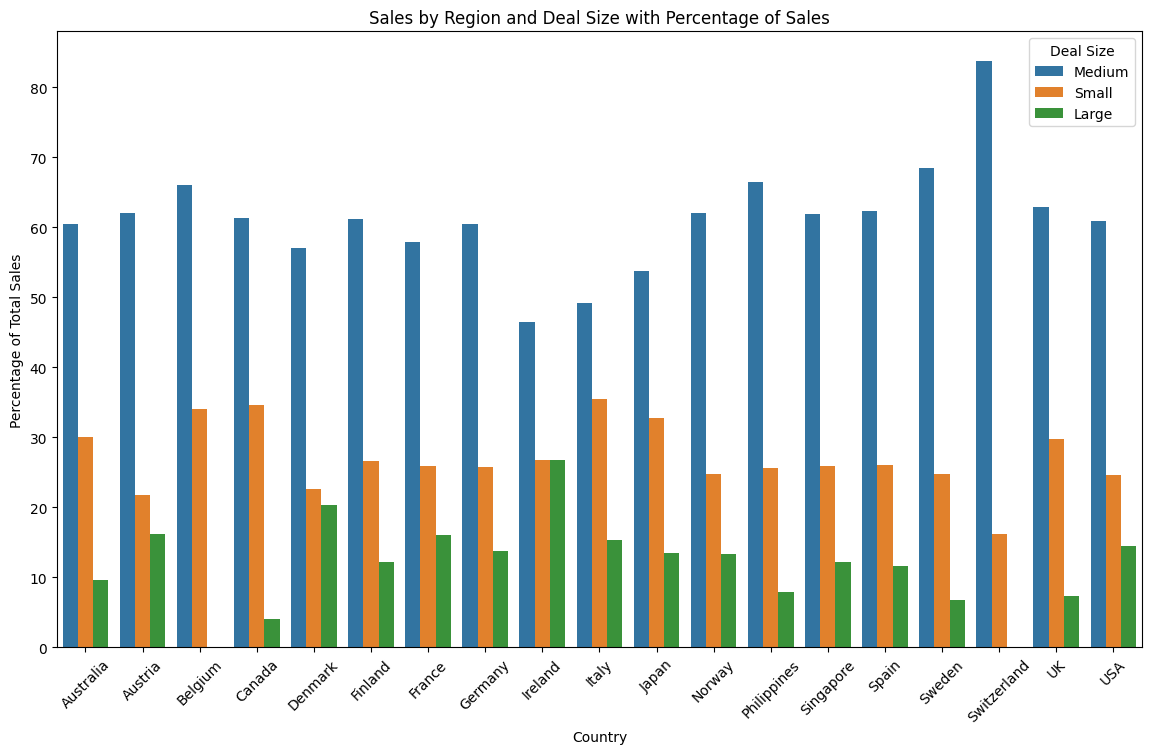

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(data=merged_region_df, x='COUNTRY', y='PERCENTAGE', hue='DEALSIZE')
plt.title('Sales by Region and Deal Size with Percentage of Sales')
plt.xlabel('Country')
plt.ylabel('Percentage of Total Sales')
plt.legend(title='Deal Size')
plt.xticks(rotation=45)
plt.show()